# K-Means Clustering

## Importing the dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')
df.shape

(200, 2)

In [4]:
# find missing values
missing_values = df.isnull().sum()
print(missing_values)

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
#convert dataframe in numpy array
data_arr = df.iloc[:,:].values
type(data_arr)


numpy.ndarray

## Using the elbow method to find the optimal number of clusters

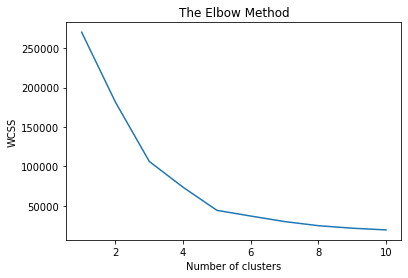

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(data_arr)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot()
plt.show()

## What Elbow to pick?
The curve might be less steep at 5 than at 3. However, the goal of the Elbow Method isn't to find the least steep point, but rather the point of diminishing returns.

The "elbow" is the number of clusters where the benefit of adding another cluster is no longer worth the cost. The benefit is the decrease in the WCSS, and the cost is the added complexity of a new cluster.

Looking at your graph, the biggest decreases in WCSS are between clusters 1 and 2, and 2 and 3. After 3, the curve flattens out, and the drop in WCSS for each new cluster becomes much smaller. While the line is less steep at 5, the most significant "bend" or change in the rate of decline happens at 3.

Because the change in the rate of decline is most pronounced at 3, that's what's typically chosen as the optimal number of clusters.

## Visualising the clusters

## Training the K-Means model on the dataset

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_predictions = kmeans.fit_predict(data_arr)

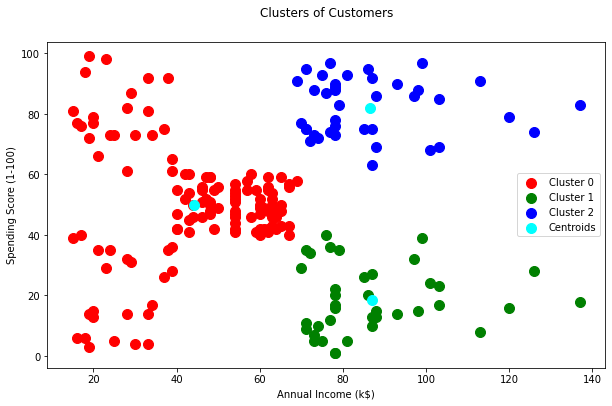

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data_arr[y_predictions == 0, 0], data_arr[y_predictions == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(data_arr[y_predictions == 1, 0], data_arr[y_predictions == 1, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(data_arr[y_predictions == 2, 0], data_arr[y_predictions == 2, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[0 : ,0], kmeans.cluster_centers_[0 : ,1], s = 100, c = 'cyan', label = 'Centroids')
plt.legend()
plt.title('Clusters of Customers', pad=25)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()